In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
df = pd.read_csv('/content/student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df1 = pd.get_dummies(df, columns=['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic'])
df1 = df1.drop(['G3'], axis=1)

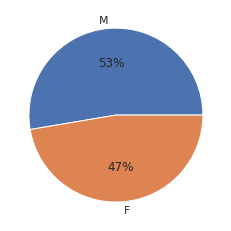

In [ ]:
sexratio = df1.groupby(['sex_M']).size() 
sexratio 
 
plt.pie(sexratio,labels=["M","F"], autopct='%.0f%%') 
plt.show()

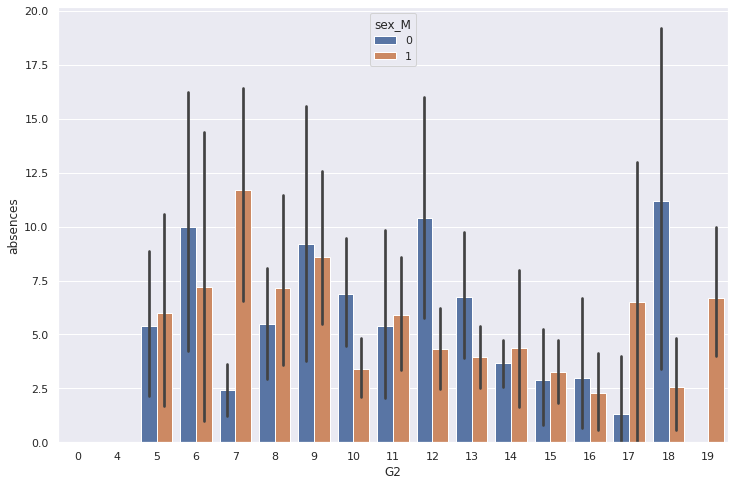

In [ ]:
sns.set_theme(style="whitegrid") 
sns.set(rc={"figure.figsize":(12, 8)}) 
firstplot = sns.barplot(x="G2", y="absences", hue="sex_M", data=df1)

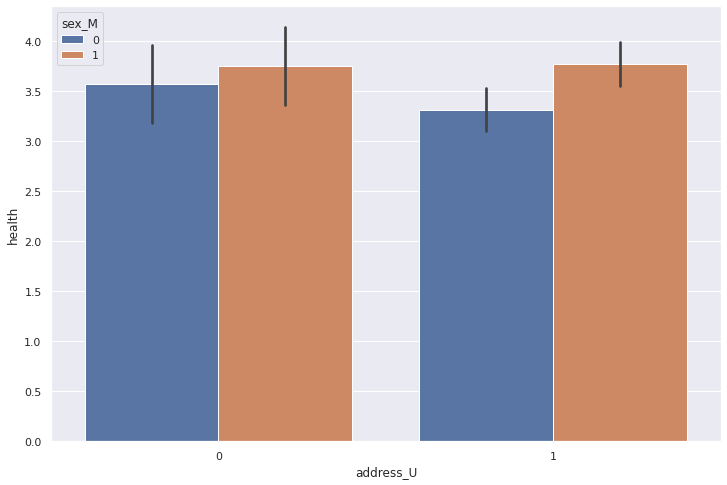

In [ ]:
sns.set(rc={"figure.figsize":(12, 8)}) 
 
thirdplot = sns.barplot(x="address_U", y="health", hue="sex_M", data=df1)

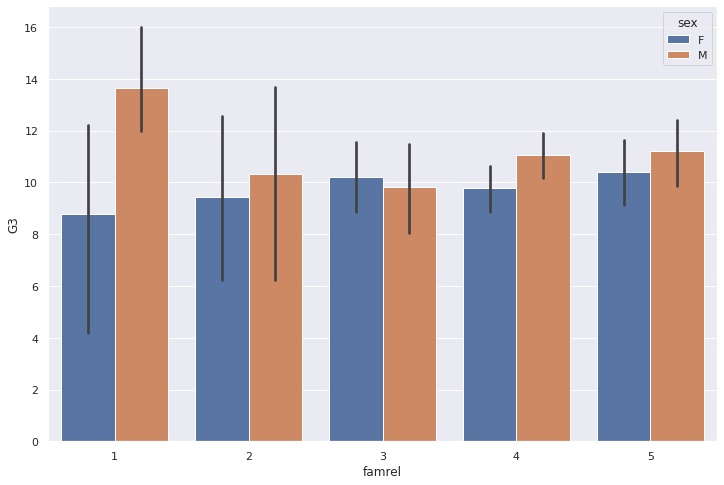

In [ ]:
thirdplot = sns.barplot(x="famrel", y="G3", hue="sex", data=df)


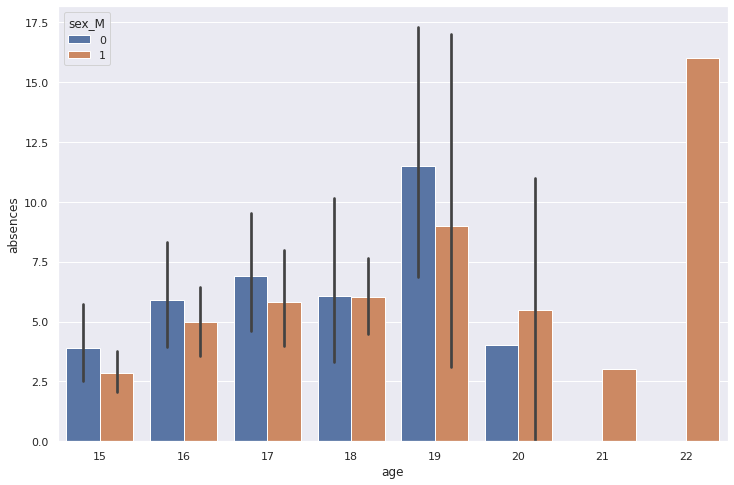

In [ ]:
thirdplot = sns.barplot(x="age", y="absences", hue="sex_M", data=df1)


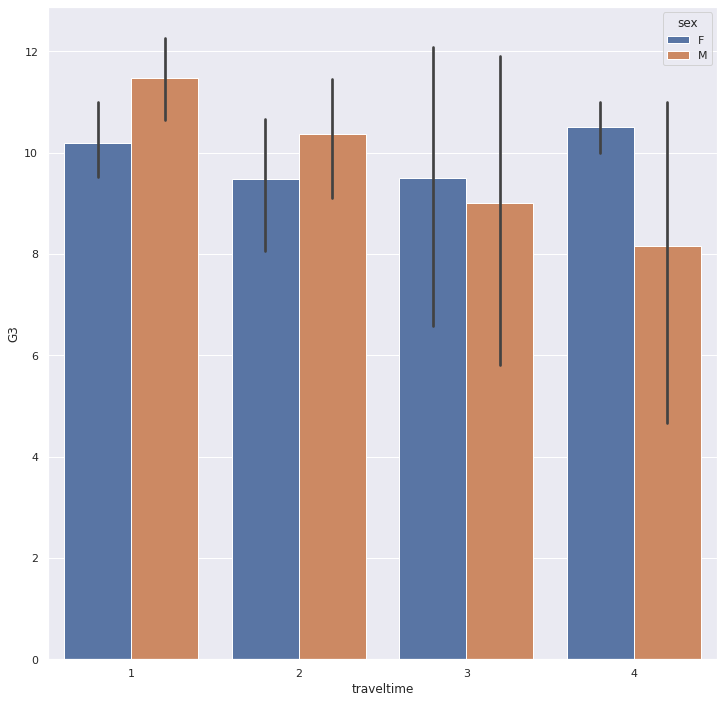

In [ ]:
sns.set(rc={"figure.figsize":(12, 12)}) 
 
thirdplot = sns.barplot(x="traveltime", y="G3", hue="sex", data=df)


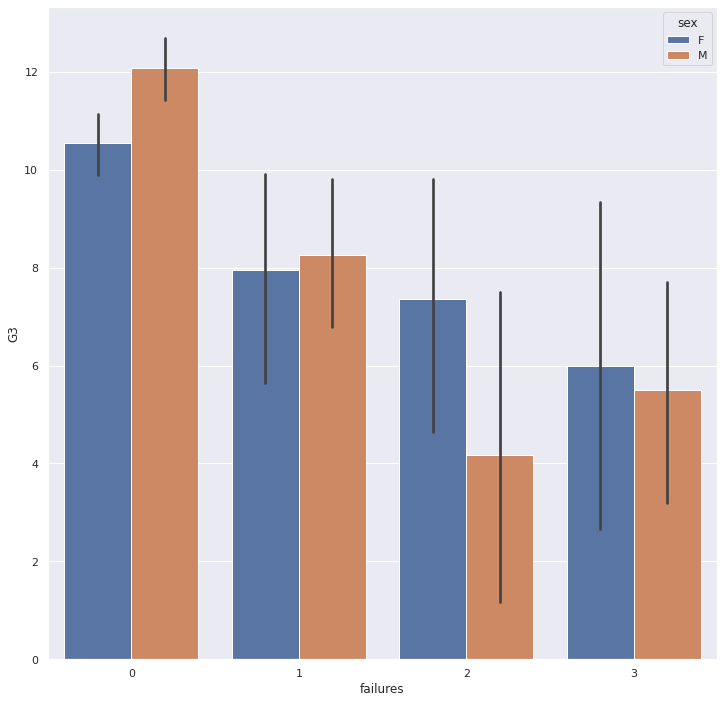

In [ ]:
sns.set(rc={"figure.figsize":(12, 12)}) 
 
thirdplot = sns.barplot(x="failures", y="G3", hue="sex", data=df)


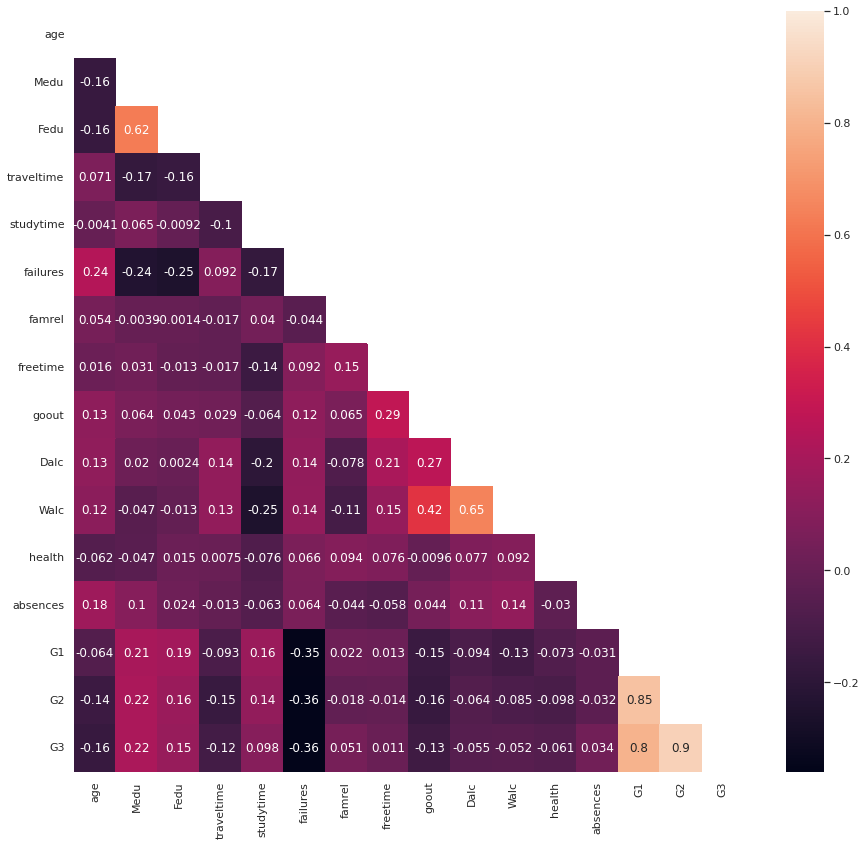

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,14))
    ax = sns.heatmap(corr, mask=mask, vmax=1, annot=True)

________________________________________________________________________________


In [ ]:
X = df1
y =  df.G3

In [ ]:
(X_train , X_test , y_train, y_test) = train_test_split(X , y ,test_size=0.4 , random_state=27)

________________________________________________________________________________

In [ ]:
## RandomForest

rf = RandomForestClassifier()
rf.fit(X_train , y_train)


RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

test_accuracy = accuracy_score(y_test , y_pred)
test_accuracy

0.35443037974683544

In [ ]:
print ('\n*Classification Report:\n', classification_report(y_test, y_pred))


*Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         6
           7       0.00      0.00      0.00         4
           8       0.46      0.55      0.50        11
           9       0.33      0.14      0.20         7
          10       0.39      0.55      0.46        20
          11       0.24      0.54      0.33        13
          12       1.00      0.07      0.12        15
          13       0.27      0.20      0.23        15
          14       0.31      0.36      0.33        11
          15       0.41      0.71      0.52        17
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         3
          18       0.25      0.20      0.22         5
          19       0.00      0.00      0.00         4
          20       0.00      0.00      0.00         1



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
res = pd.DataFrame({'real':y_test, 'predict':y_pred})
res.sample(10)

,real,predict
227,12,11
199,10,8
330,8,9
66,12,14
371,12,10
390,9,8
5,15,15
323,15,13
261,8,11
380,14,15


________________________________________________________________________________

In [ ]:
## RandomizedGridSearch RandomForest
rf = RandomForestClassifier()
params = {'n_estimators':[100,150,250,500,1000,1500,2000,2500], 
          'max_depth':np.arange(1,12), 
          'class_weight':['balanced','balanced_subsample'],
          'max_features': ['auto','sqrt'],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'min_samples_leaf':np.arange(1,12),
          'min_samples_split':np.arange(1,12)
        }
rf_rgc = RandomizedSearchCV(rf, param_distributions = params , cv=10)
rf_rgc.fit(X_train,y_train)

In [ ]:
print('Mejores parametros: {}'.format(rf_rgc.best_params_))

print('Mejor score:{}'.format(rf_rgc.best_score_))

Mejores parametros: {'n_estimators': 2000, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced_subsample', 'bootstrap': False}
Mejor score:0.3798913043478261


In [ ]:
print ('\n*Classification Report:\n', classification_report(y_test, y_pred))





*Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        15
           4       0.00      0.00      0.00         0
           5       1.00      0.50      0.67         2
           6       0.50      0.67      0.57         6
           7       0.50      0.25      0.33         4
           8       0.29      0.18      0.22        11
           9       0.18      0.29      0.22         7
          10       0.53      0.40      0.46        20
          11       0.13      0.15      0.14        13
          12       0.50      0.20      0.29        15
          13       0.29      0.27      0.28        15
          14       0.20      0.27      0.23        11
          15       0.35      0.47      0.40        17
          16       0.14      0.11      0.12         9
          17       0.00      0.00      0.00         3
          18       0.20      0.40      0.27         5
          19       0.00      0.00      0.00         4
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
y_pred = rf_rgc.predict(X_test)

test_accuracy = accuracy_score(y_test , y_pred)
test_accuracy

0.35443037974683544

In [ ]:
res = pd.DataFrame({'real':y_test, 'predict':y_pred})
res.sample(10)

,real,predict
59,16,18
91,18,15
331,14,14
154,12,11
391,16,15
68,8,10
304,13,14
70,15,15
186,11,11
193,10,9


_______________________________________________________________________________


In [ ]:
## LinearRegression

reg = LinearRegression()

reg.fit(X_train , y_train)


LinearRegression()

In [ ]:
reg.score(X_test,y_test)


0.8140404442231206

In [ ]:
y_pred = reg.predict(X_test)


res = pd.DataFrame({'real':y_test, 'predict':y_pred})
res.sample(10)

,real,predict
274,10,9.862829
3,15,13.813971
298,14,12.683526
40,11,8.995049
183,8,11.275038
29,11,11.866386
98,14,14.694962
7,6,3.745826
299,16,13.316739
91,18,18.752039


In [ ]:
## RandomizedGridSearch LinearRegression
lr = LinearRegression()
params = {'copy_X': ['True','False'], 
          'fit_intercept': ['True','False'],  
          'n_jobs': [None,2,3,4,5,6],
          'normalize': ['deprecated' ],
          'positive': ['True','False']
          }
lr_cv = RandomizedSearchCV(lr, param_distributions = params , cv=10)
lr_cv.fit(X_train,y_train)

In [ ]:
print('Mejores parametros: {}'.format(lr_cv.best_params_))

print('Mejor score:{}'.format(lr_cv.best_score_))

Mejores parametros: {'positive': 'False', 'normalize': 'deprecated', 'n_jobs': 6, 'fit_intercept': 'False', 'copy_X': 'True'}
Mejor score:0.7235754605610323


In [ ]:
lr_cv.score(X_test,y_test)


0.8235270018323193